# Exploring various Time Series forecasting methods -AR, MA, ARMA, ARIMA, SARIMA, Holts-trend, Holts-winter
**End to End ML Project - Superstore 'Furniture' sales Forecasting**

## Introduction to Time Series

 ### Importance of Time series Analysis and Forecasting

Time series refers to a sequence of data points collected or recorded over a period of time, where the order of the observations is crucial. In a time series, each data point is associated with a specific timestamp or time period, enabling the analysis of patterns, trends, and dependencies within the data. Time series data is commonly found in various domains such as finance, economics, weather forecasting, stock market analysis, sales forecasting, and many others.

Time series forecasting involves using historical data to predict future values or patterns in the time series. It plays a vital role in decision-making, planning, and understanding the behavior of dynamic systems

- Time series forecasting provides valuable insights into future trends and patterns.
- Accurate forecasting helps businesses make informed decisions and plan strategically.
- It enables organizations to optimize resource allocation and improve operational efficiency.
- Forecasting plays a critical role in demand forecasting, inventory management, and supply chain optimization.
- Time series forecasting enhances risk management and aids in proactive decision-making.

### Understanding Time series data

**Time Dependence**: Time series data exhibits a temporal dependence, meaning that the values observed at one time point are influenced by the values observed at previous time points. This dependency allows us to analyze and predict future values based on historical patterns.

**Trend**: A trend represents the long-term movement or direction of the data over time. It can be upward (increasing), downward (decreasing), or stable (no significant change). Understanding and capturing trends is crucial in forecasting future values accurately.

**Seasonality**: Seasonality refers to repeating patterns or fluctuations that occur within a specific time frame, such as daily, weekly, or yearly. It often arises due to external factors like weather, holidays, or cultural events. Identifying and accounting for seasonality is essential for accurate forecasting.

**Cyclic Pattern**: The cyclic nature of time series data refers to the presence of patterns or fluctuations that occur over a longer time frame than seasonality. Unlike seasonality, which follows a regular and predictable pattern, cyclic behavior tends to have more irregular and non-repetitive fluctuations. These cycles are often influenced by economic, political, or other long-term factors.

**Stationarity**: Stationarity is a critical characteristic of time series data. A stationary time series has constant mean, variance, and autocovariance over time. It means that the statistical properties of the data do not change over time. Stationarity simplifies the analysis and allows us to make reliable predictions.

**Irregularity**: Irregular or random fluctuations represent the unpredictable component of time series data. These fluctuations can be caused by unexpected events, noise, or other random factors. Handling irregularity is important to distinguish it from meaningful patterns in the data.

**Correlation**: Correlation measures the strength and direction of the linear relationship between two variables. In time series analysis, we often explore the correlation between the current observation and previous observations. Understanding the correlation helps us identify dependencies and patterns in the data.

**Autocorrelation**: Autocorrelation, also known as serial correlation, measures the relationship between an observation and previous observations at different time lags. It helps us determine the presence of any patterns or dependencies within the time series. Autocorrelation is a vital concept for understanding and modeling time series data.

### Problem Statement

The objective of this project is to develop an accurate and reliable forecasting model to predict the sales of a super store. The sales data includes information on various products and time periods. The challenge is to create a robust forecasting model that can accurately estimate future sales for the super store, enabling effective inventory management, resource allocation, and strategic decision-making.

### Objectives

Sales Forecasting Objectives:

- **Accurate Sales Prediction**: To accurately predict future sales figures.
- **Demand Planning and Inventory Management**: To plan inventory levels based on anticipated demand.
- **Resource Allocation and Production Planning**: To allocate resources efficiently based on expected sales volumes.
- **Budgeting and Financial Planning**: To estimate future revenue streams for budgeting and financial decision-making.
- **Strategic Decision-Making**: To provide insights for strategic planning and decision-making.

### Selecting a Dataset

The data we will use is the superstore sales data, and it can be download here.https://community.tableau.com/docs/DOC-1236

## Exploring the 'Superstore Sales' dataset

### Installing and Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import itertools
import statsmodels.api as sm

### Downloading the dataset

In [2]:
data_df = pd.read_excel('Superstore.xls')

In [3]:
data_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [296]:
data_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Understanding the Data

We found that there is an interesting column Category which can divided the data into several subsets according to the product categories. Let's see how many categories of products we have in the data.

In [4]:
data_df = data_df[['Order Date', 'Category','Sales']]

In [80]:
data_df

,Order Date,Category,Sales
0,2016-11-08,Furniture,261.9600
1,2016-11-08,Furniture,731.9400
2,2016-06-12,Office Supplies,14.6200
3,2015-10-11,Furniture,957.5775
4,2015-10-11,Office Supplies,22.3680
...,...,...,...
9989,2014-01-21,Furniture,25.2480
9990,2017-02-26,Furniture,91.9600
9991,2017-02-26,Technology,258.5760
9992,2017-02-26,Office Supplies,29.6000


In [81]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Category    9994 non-null   object        
 2   Sales       9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 234.4+ KB


In [82]:
data_df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

Now we can analyse different categories of products accordingly. In this Notebook, let's take the Office Supplies data as an example. We will start our time series analysis on this category of products. You can also explore other categories in a similar way.

In [5]:
# Extract the data of Office Supplies
furniture_df = data_df.loc[data_df['Category'] == 'Furniture']

In [6]:
furniture_df = furniture_df[['Order Date','Sales']]

In [7]:
furniture_df  = furniture_df .sort_values('Order Date')
furniture_df = furniture_df.groupby('Order Date')['Sales'].sum().reset_index()

In [368]:
furniture_df 

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


### Hypothesis Generation

- The sales of office supplies have shown a consistent upward trend over the months and years, indicating increasing demand for these products.
- There is a monthly seasonality pattern in office supplies sales, with higher sales during certain months of the year, such as back-to-school seasons or during holiday periods.

## Visualizing the Time series

### Set Time Index

In [8]:
furniture_df .set_index('Order Date', inplace=True)

In [370]:
furniture_df 

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


### Checking the Time series

In [371]:
furniture_df.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)


It appears that the datetime index in our dataset is not continuous and includes specific dates rather than a continuous sequence of dates. In order to analyze the data in terms of monthly trends and seasonality, it is common to resample the data by aggregating it at the monthly level. This means that you would calculate the average daily sales value for each month and use the start of each month as the timestamp.

By resampling the data in this way, you can overcome the issue of having non-continuous dates and analyze the sales data in a monthly format, which makes it easier to identify trends and seasonality patterns.

### Time Resampling

In [9]:
furniture_df = furniture_df['Sales'].resample('MS').mean().to_frame()
# MS = Month Start frequency

In [373]:
furniture_df 

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


### Visualising Trend, Pattern, Seasonalities and Observations

In [12]:
# A function to generate plot with trend line
import numpy as np
import matplotlib.dates as mdates
def generate_plot(data_df,x= None, title=None, xlabel="Order Date", ylabel="Sales", dpi=100, title_size=20, label_size=12):
    plt.figure(figsize=(20, 5), dpi=dpi)
    plt.plot(data_df.index, x, color='b')
    
    # Calculate the trend line
    trend = np.polyfit(range(len(data_df)), x, 1)
    trend_line = np.poly1d(trend)
    plt.plot(data_df.index, trend_line(range(len(data_df))), color='r', linestyle='--', label='Trend Line')
    
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=90,fontsize=14)
    plt.xlabel(xlabel, fontsize=label_size)  # Increase x-axis label size
    plt.ylabel(ylabel, fontsize=label_size)  # Increase y-axis label size
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Month and Year format
    plt.grid(True, alpha=0.4)  # Add grid with light opacity
    plt.gca().title.set_fontsize(title_size) # Increase title size
    plt.show()

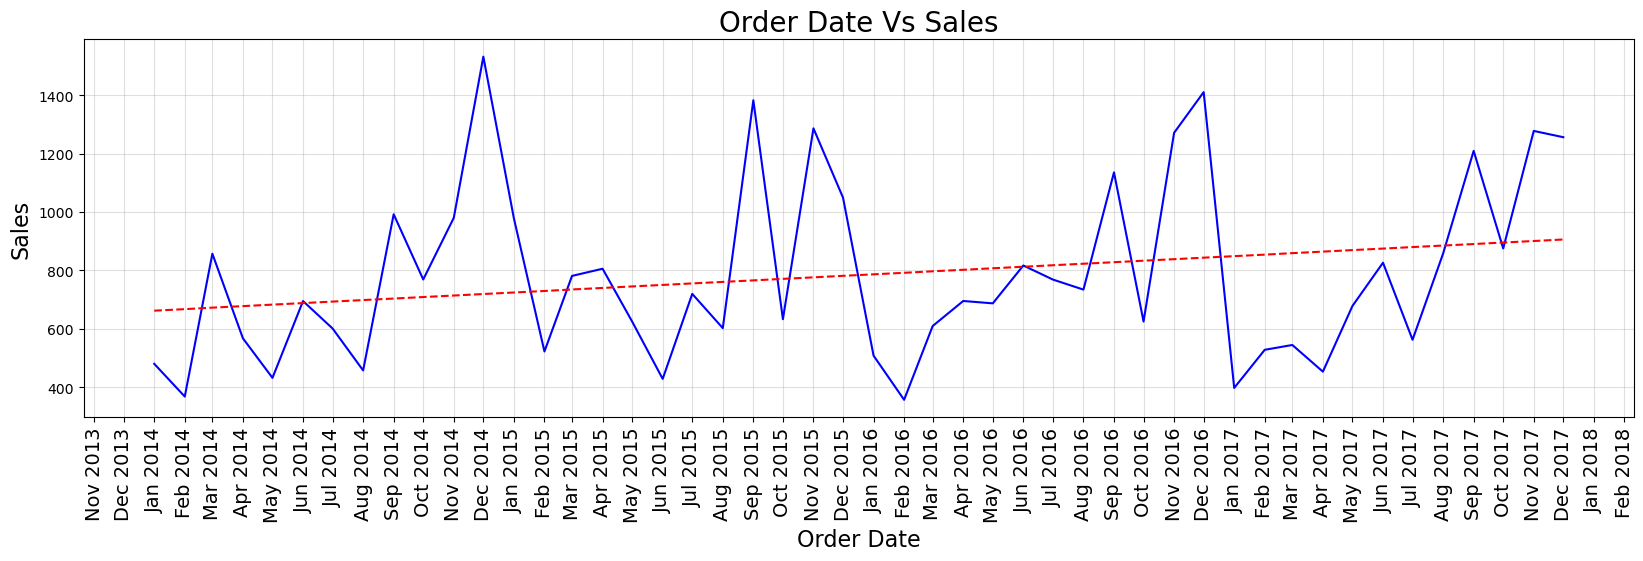

In [13]:
generate_plot(furniture_df ,x= furniture_df["Sales"], title="Order Date Vs Sales", xlabel="Order Date", ylabel="Sales", dpi=100,title_size=20, label_size=16)

**Observations and findings**

- **Trend**: There is a slight increasing trend in office supplies sales over the years, indicating a general growth or rising demand for these products.

- **Seasonality**: The time series exhibits seasonal peaks in few months(Sept and Dec). Lets find it clear seasonality when we decompose the time series

- **Stationarity**: The time series appears to be almost stationary, suggesting that the data does not exhibit significant trends or seasonality. However, formal stationary testing is planned to confirm this characteristic.

- **Lowest Sales Periods**: February 2016  identified as the periods with the lowest sales of furniture. Further analysis is needed to understand the potential factors contributing to these low sales, such as seasonal effects, marketing campaigns, or external events.

## Decomposition and Components of the Times series

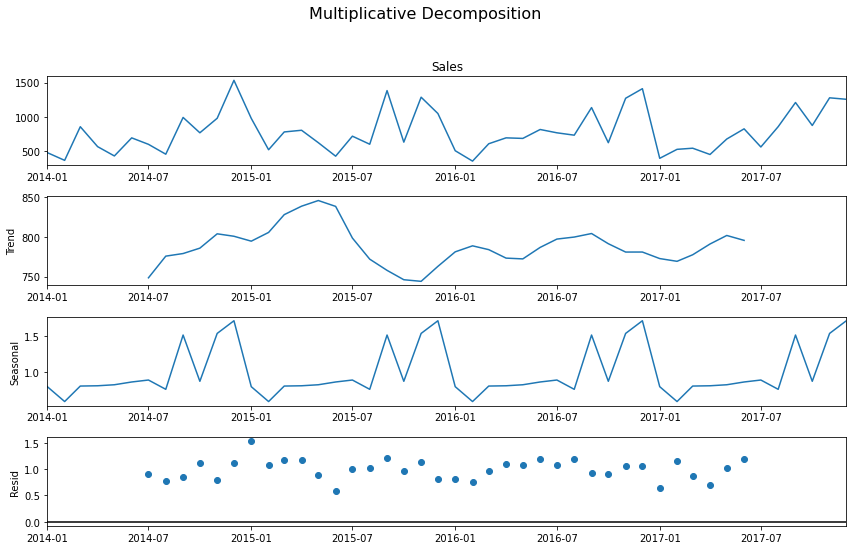

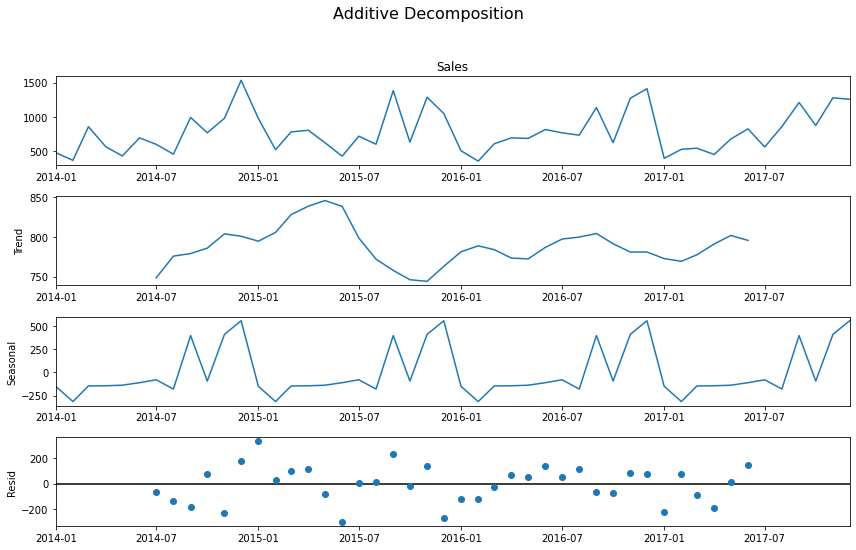

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform Additive Decomposition
decomposition_add = seasonal_decompose(furniture_df["Sales"], model='additive')

# Perform Multiplicative Decomposition
decomposition_mul = seasonal_decompose(furniture_df["Sales"], model='multiplicative')

# Plot
plt.rcParams.update({'figure.figsize': (12,8)})

decomposition_mul.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

decomposition_add.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


Observations from Time Series Decomposition:

- Trend: Stable trend until June 2015, followed by a sudden level shift and decreasing trend.
- Seasonality: Seasonal pattern observed 
- Residuals/Errors: few errors. all are random.

These observations provide further insights into the decomposition of the furniture sales time series. The stable trend until a sudden level shift, recurring seasonality, and random residuals suggest the presence of underlying patterns and dynamics within the data

- Make sure to use model that capture both trend and seasonality for accurate and reliable forecast

## Testing for Stationarity

**Augmented Dickey-Fuller (ADF)** test, are commonly used to check for stationarity in time series data. The ADF test is a statistical test that helps determine if a unit root is present in a time series, which indicates non-stationarity.

The ADF test evaluates the null hypothesis that a unit root is present in the data. If the p-value obtained from the test is below a certain significance level (e.g., 0.05), we reject the null hypothesis and conclude that the data is stationary. On the other hand, if the p-value is above the significance level, we fail to reject the null hypothesis, indicating non-stationarity.

Applying the ADF test to your dataset can provide a more rigorous assessment of stationarity.

In [15]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(furniture_df['Sales'])

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Compare p-value with significance level
if p_value < 0.05:
    print("The time series is stationary (reject null hypothesis)")
else:
    print("The time series is non-stationary (fail to reject null hypothesis)")

# Print ADF test statistics and p-value
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

The time series is stationary (reject null hypothesis)
ADF Statistic: -5.191070187339278
p-value: 9.168756655665362e-06


Although the p-value <  0.05, indicating that the time series is stationary, we will still attempt to further enhance its stationarity.

## Differencing and Transformation

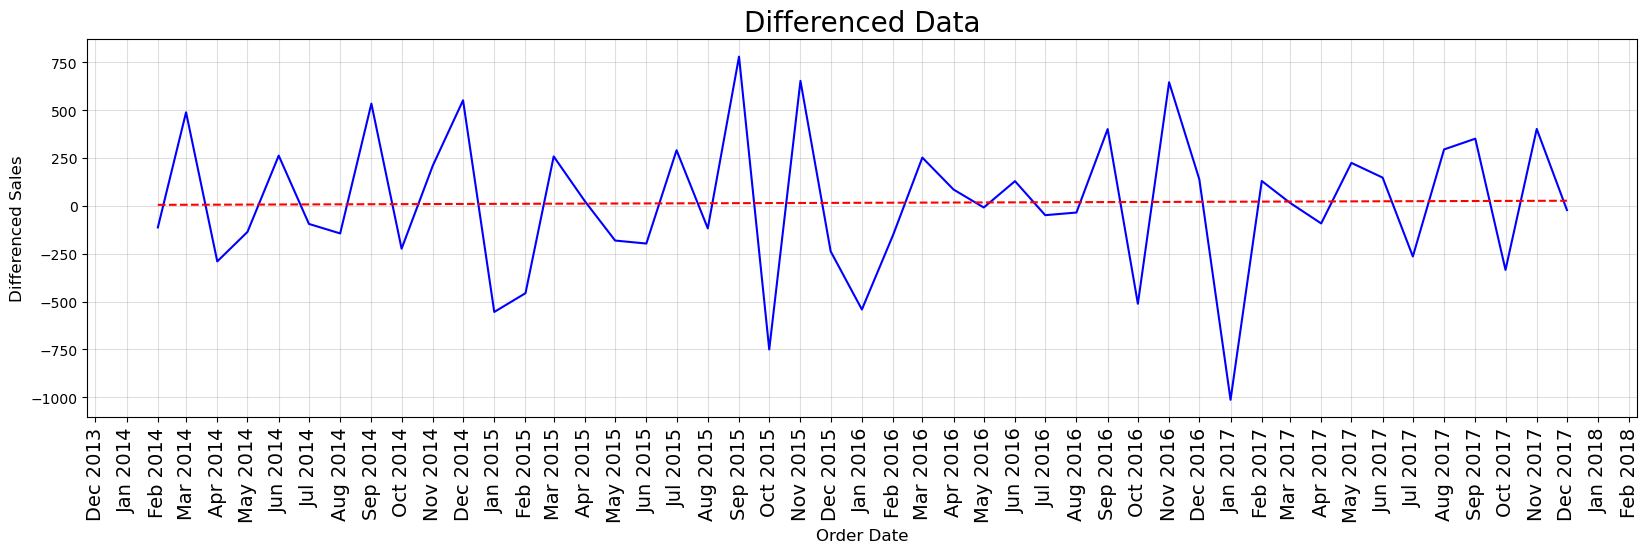

In [18]:
# Apply differencing to make the data stationary
furniture_df['Differenced_Data'] = furniture_df['Sales'].diff()
# Drop missing values
furniture_df.dropna(inplace=True)
# Plot the differenced data
generate_plot(furniture_df, x=furniture_df['Differenced_Data'], title='Differenced Data', ylabel='Differenced Sales')

Now our time series looks more stationary

## Autocorrelation and Partial Autocorrelation Analysis

In [19]:
len(furniture_df['Sales'])

47

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


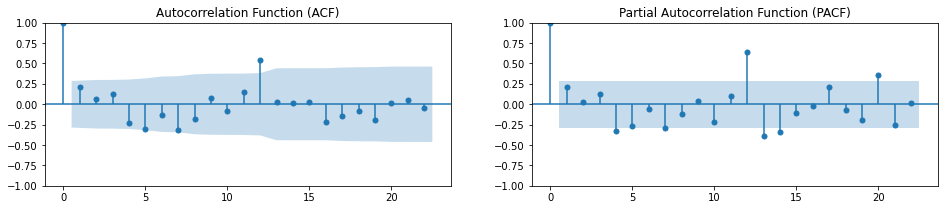

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create subplots for ACF and PACF
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 3))

# Compute ACF and PACF
plot_acf(furniture_df['Sales'], lags=22, ax=ax1)
plot_pacf(furniture_df['Sales'], lags=22, ax=ax2)

# Set plot  title
ax1.set_title('Autocorrelation Function (ACF)')
ax2.set_title('Partial Autocorrelation Function (PACF)')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plots
plt.show()

In the case of the ACF graph, if one lollipop touches the confidence interval shaded region, it indicates a significant autocorrelation at that lag. This can suggest the possibility of using an autoregressive (AR) model with that lag value, implying a potential dependence of the current value on the previous value at that lag.

Similarly, in the PACF graph, if one lollipop touches the confidence interval shaded region, it suggests a significant partial autocorrelation at that lag. This implies that there may be a direct relationship between the current value and the value at that specific lag in the past, potentially indicating the need for an MA (Moving Average) model with that lag value.

Therefore, observing a single lollipop touching the confidence interval in either the ACF or PACF plot may suggest the potential value of 1 for either the lag of an AR model (AR-0) or the lag of an MA model (MA-1).

ACF gives MA order
PACF gives AR order

## Preparing Time Series Dataset before Applying Models

### Set the Time Index

In [26]:
# we have already set the time index so now lets see the next steps

### Check for White Noise

In [27]:
# We can see the trend and seasonality. There is no white noise and we can continue to next step

### Check for Stationarity

In [28]:
# we already checked the stationarity and also did differencing to make the series stationary

### Split the Dataset

A commonly used guideline is to allocate a larger portion of the data for training and a smaller portion for testing, 
especially when dealing with longer time series. A commonly used split is 80% for training and 20% for testing. This 
split allows the model to learn from a significant amount of historical data while still providing a reasonable amount 
of data for evaluation

In [21]:
furniture_df  = furniture_df.drop('Differenced_Data', axis=1)

In [64]:
import pandas as pd

# Assuming your dataset is named 'office_supplies_df1' with 'Sales' as a column and 'Order Date' as the index

# Convert the index ('Order Date') to datetime if it's not already
furniture_df.index = pd.to_datetime(furniture_df.index)

# Split the dataset into training and testing sets
train_df = furniture_df.loc[:'2017-01-01']
test_df = furniture_df.loc['2017-01-01':]


In [24]:
train_df.shape

(36, 1)

In [25]:
test_df.shape

(12, 1)

### Handle Missing Values

In [119]:
#No missing values

### Normalize or Scale the Data

In [120]:
#Here in this dataset the data is already scaled 

## Time series Forecasting Models

### Moving-average model s
- **Auto Regression(AR)**
- **Moving Average (MA)**
- **Auto Regression Moving Average(ARMA)** 
- **Auto Regression Integrated Moving Average(ARIMA)**
- **Seasonal Regression Integrated Moving Average(SARIMA)**
- **Auto ARIMA**

#### Auto Regression(AR)

Definition: The autoregressive model uses past observations of the time series to predict future values. It assumes that the future values depend linearly on the previous values.

How it works: The AR model is based on the concept of autoregression, where each value in the time series is regressed on one or more previous values.

Example: An AR(1) model with a lag of 1 can be represented as: Y(t) = c + ϕ*Y(t-1) + ε(t), where Y(t) is the current value, Y(t-1) is the lagged value, c is the intercept, ϕ is the coefficient, and ε(t) is the error term.

Since AR has been removed from statsmodels, we will use ARIMA model (AR,I,MA) - (p,d,q) giving only the value of AR and give null value to the other components

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Set the lag order, e.g., AR(1)
lag_order = 1

# Build Model
ar_model = ARIMA(train_df, order=(lag_order, 0, 0))   
ar_model_fit = ar_model.fit()

# Print AIC value
print(f"AIC: {ar_model_fit.aic}")

AIC: 520.0107160878604


In [27]:
# Make predictions on the testing set
predictions = ar_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])

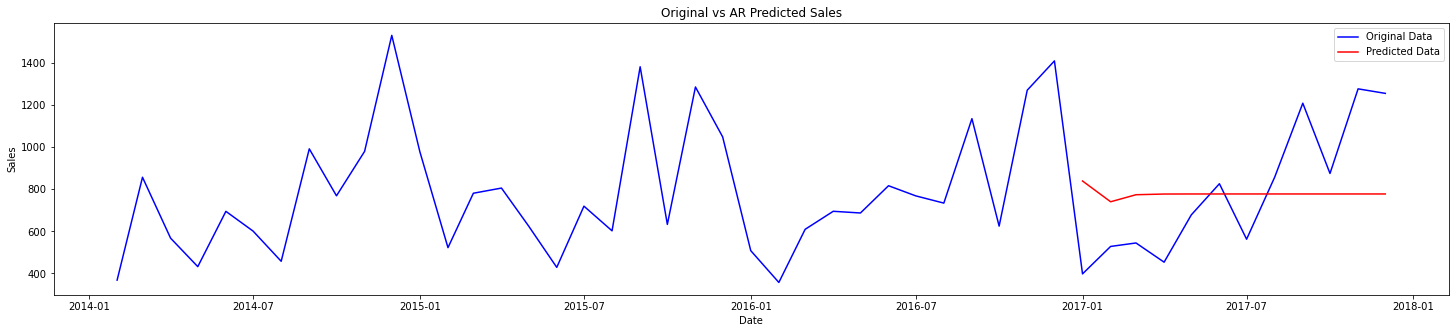

In [28]:
# Plot the actual values and predictions
plt.figure(figsize=(25,5))

plt.plot(furniture_df.index, furniture_df['Sales'], label='Original Data', color='blue')
plt.plot(test_df.index, predictions, label='Predicted Data', color='red')

plt.title('Original vs AR Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [29]:
# Evaluate the model
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 94843.18538860943
Mean Absolute Error (MAE): 263.28369590228107
Root Mean Squared Error (RMSE): 307.96620819273244


Reason for moving to the next model: The AR model is not able to capture  patterns and seasonality in the data.

#### Moving Average(MA)

Definition: The moving average model uses past forecast errors to predict future values. It assumes that the future values depend on the average of past forecast errors.

How it works: The MA model is based on the concept of moving averages, where each value in the time series is a weighted sum of past forecast errors.

Example: An MA(1) model with a lag of 1 can be represented as: Y(t) = μ + θ*ε(t-1) + ε(t), where Y(t) is the current value, μ is the mean, θ is the coefficient, ε(t-1) is the lagged forecast error, and ε(t) is the current forecast error.

In [30]:
# Set the lag order, e.g., MA(1)
lag_order = 1

# Build Model
ma_model = ARIMA(train_df, order=(0, 0, lag_order))   
ma_model_fit = ma_model.fit()

# Print AIC value
print(f"AIC: {ma_model_fit.aic}")

AIC: 520.0097119277624


In [31]:
# Make predictions on the testing set
predictions = ma_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])

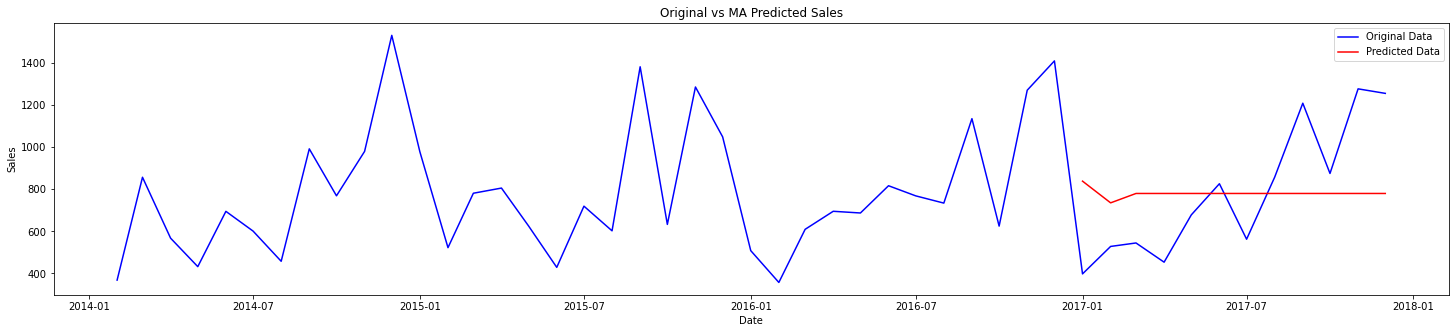

In [32]:
# Plot the actual values and predictions
plt.figure(figsize=(25,5))

plt.plot(furniture_df.index, furniture_df['Sales'], label='Original Data', color='blue')
plt.plot(test_df.index, predictions, label='Predicted Data', color='red')

plt.title('Original vs MA Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [390]:
# Evaluate the model
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 90837.98506489028
Mean Absolute Error (MAE): 250.61547880881875
Root Mean Squared Error (RMSE): 301.3934058085715


Reason for moving to the next model: The MA model is not able to capture  patterns and seasonality in the data.

#### Auto Regression Moving Average(ARMA)

Definition: The autoregressive moving average model combines the AR and MA models. It captures both the linear dependency on past values and the dependency on past forecast errors.\

How it works: The ARMA model includes both autoregressive and moving average terms to model the time series data.

Example: An ARMA(1,1) model with a lag of 1 can be represented as: Y(t) = c + ϕY(t-1) + θε(t-1) + ε(t), where Y(t) is the current value, Y(t-1) is the lagged value, c is the intercept, ϕ and θ are the coefficients, ε(t-1) is the lagged forecast error, and ε(t) is the current forecast error.

In [33]:
# Set the lag order, e.g.,AR(1) and MA(1)
lag_order = 1

# Build Model
arma_model = ARIMA(train_df, order=(lag_order,0,lag_order))   
arma_model_fit = arma_model.fit()

# Print AIC value
print(f"AIC: {arma_model_fit.aic}") 

AIC: 521.7686882668906


In [34]:
# Make predictions on the testing set
predictions = arma_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])

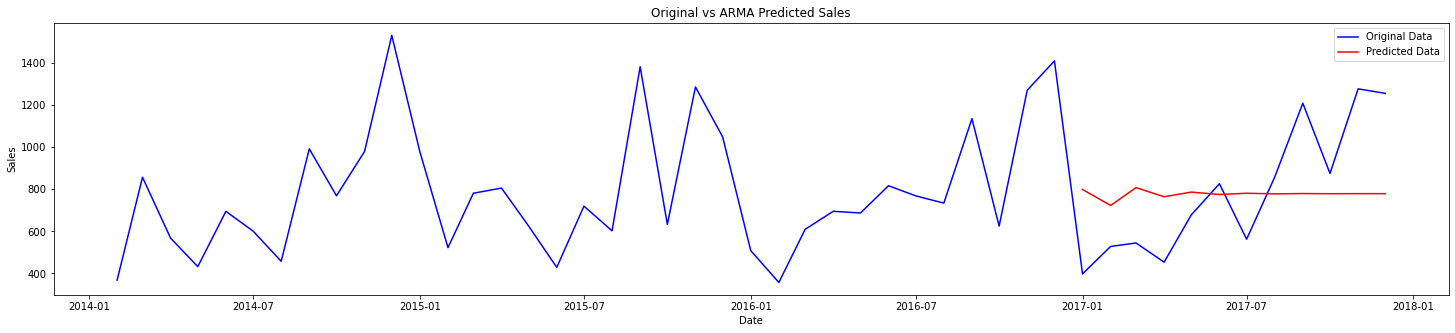

In [35]:
# Plot the actual values and predictions
plt.figure(figsize=(25,5))

plt.plot(furniture_df.index, furniture_df['Sales'], label='Original Data', color='blue')
plt.plot(test_df.index, predictions, label='Predicted Data', color='red')

plt.title('Original vs ARMA Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [36]:
# Evaluate the model
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 91997.20098316281
Mean Absolute Error (MAE): 260.87094648319186
Root Mean Squared Error (RMSE): 303.31040368434907


Reason for moving to the next model: The ARMA model is not able to capture  patterns and seasonality in the data.

#### Auto Regression Moving Average(ARIMA)

Definition: The autoregressive integrated moving average model extends the ARMA model by incorporating differencing to achieve stationarity.

How it works: The ARIMA model includes differencing of the time series to remove trend and seasonality before applying the ARMA model to the differenced data.

Example: An ARIMA(1,1,1) model with differencing of order 1 can be represented as: Y(t) - Y(t-1) = c + ϕ*(Y(t-1) - Y(t-2)) + θ*ε(t-1) + ε(t), where Y(t) is the differenced value, c is the intercept, ϕ and θ are the coefficients, ε(t-1) is the lagged forecast error, and ε(t) is the current forecast error.

In [37]:
from statsmodels.tsa.arima.model import ARIMA

# Identify the order of the ARIMA model
p = 1  # Autoregressive order
d = 1  # Order of differencing
q = 1  # Moving average order

# Fit the ARIMA model on the training data
arima_model = ARIMA(train_df['Sales'], order=(p, d, q))
arima_model_fit = arima_model.fit()

# Print AIC value
print(f"AIC: {arma_model_fit.aic}") 

AIC: 521.7686882668906


In [38]:
# Make predictions on the test data
predictions = arima_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])

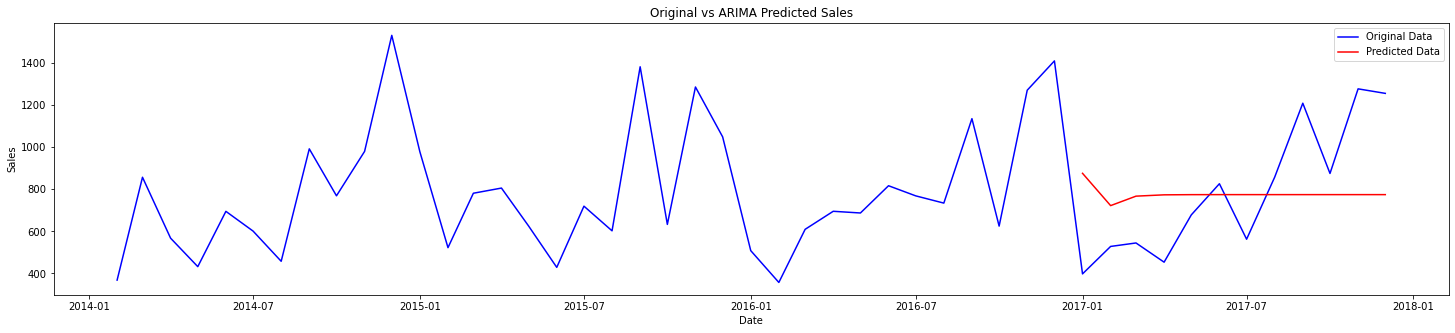

In [39]:
# Plot the actual values and predictions
plt.figure(figsize=(25,5))

plt.plot(furniture_df.index, furniture_df['Sales'], label='Original Data', color='blue')
plt.plot(test_df.index, predictions, label='Predicted Data', color='red')

plt.title('Original vs ARIMA Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [40]:
# Evaluate the model
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 97257.86417712487
Mean Absolute Error (MAE): 264.9539667892729
Root Mean Squared Error (RMSE): 311.86193127267853


**Finding best  p,d,q values  to make better fit**

In [44]:
import itertools
import warnings
warnings.filterwarnings("ignore")

# Define the range of p, d, q values to try
p_values = range(0, 3)  # Autoregressive order
d_values = range(0, 2)  # Order of differencing
q_values = range(0, 3)  # Moving average order

# Create a list of all possible combinations of p, d, q values
pdq_values = list(itertools.product(p_values, d_values, q_values))

# Initialize variables to store the best model and AIC value
best_model = None
best_aic = float('inf')

# Iterate through all combinations of p, d, q values
for pdq in pdq_values:
    try:
        # Fit the ARIMA model on the training data
        arima_model = ARIMA(train_df['Sales'], order=pdq)
        arima_model_fit = arima_model.fit()
        
        # Get the AIC value for the current model
        aic = arima_model_fit.aic
        
        # Check if the current model has a lower AIC value than the best model so far
        if aic < best_aic:
            best_aic = aic
            best_model = arima_model_fit
            best_pdq = pdq
        
        print(f"ARIMA{pdq} - AIC: {aic}")
    except:
        continue

# Print the best model and its AIC value
print(f"Best Model: ARIMA{best_pdq} - AIC: {best_aic}")

ARIMA(0, 0, 0) - AIC: 518.330224620073
ARIMA(0, 0, 1) - AIC: 520.0097119277624
ARIMA(0, 0, 2) - AIC: 521.9821249464798
ARIMA(0, 1, 0) - AIC: 522.1156892690892
ARIMA(0, 1, 1) - AIC: 508.97077895260776
ARIMA(0, 1, 2) - AIC: 510.3752474806425
ARIMA(1, 0, 0) - AIC: 520.0107160878604
ARIMA(1, 0, 1) - AIC: 521.7686882668906
ARIMA(1, 0, 2) - AIC: 520.8729697553186
ARIMA(1, 1, 0) - AIC: 517.2456252650068
ARIMA(1, 1, 1) - AIC: 510.36302292710315
ARIMA(1, 1, 2) - AIC: 512.2925927130004
ARIMA(2, 0, 0) - AIC: 522.01246414568
ARIMA(2, 0, 1) - AIC: 523.7714853157031
ARIMA(2, 0, 2) - AIC: 514.3943922484309
ARIMA(2, 1, 0) - AIC: 513.2794795346701
ARIMA(2, 1, 1) - AIC: 515.2678392528976
ARIMA(2, 1, 2) - AIC: 514.3103397254688
Best Model: ARIMA(0, 1, 1) - AIC: 508.97077895260776


**Training ARIMA Model with best_fit**

In [45]:
# Identify the order of the ARIMA model
# Best Model: ARIMA(0, 1, 1) - AIC: 508.97077895260776

# Fit the ARIMA model on the training data
best_arima_model = ARIMA(train_df['Sales'], order=(0,1,1))
best_arima_model_fit = best_arima_model.fit()

# Print AIC value#### Training ARIMA Model with best_fit
print(f"AIC: {best_arima_model_fit.aic}") 

AIC: 508.97077895260776


In [46]:
# Make predictions on the test data using the best model
predictions = best_model.predict(start=test_df.index[0], end=test_df.index[-1])

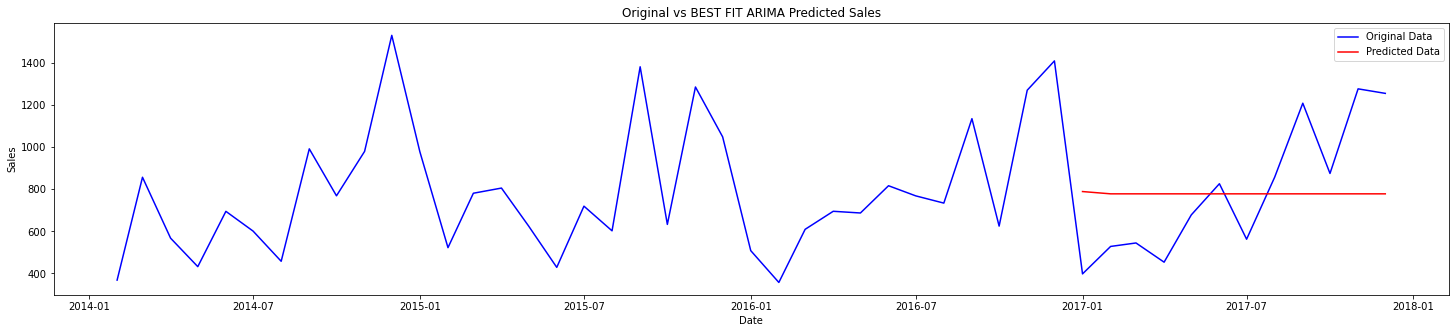

In [47]:
# Plot the actual values and predictions
plt.figure(figsize=(25, 5))
plt.plot(furniture_df.index, furniture_df['Sales'], label='Original Data', color='blue')
plt.plot(test_df.index, predictions, label='Predicted Data', color='red')
plt.title('Original vs BEST FIT ARIMA Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [48]:
# Evaluate the model
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 92889.9363507402
Mean Absolute Error (MAE): 262.47118648596137
Root Mean Squared Error (RMSE): 304.7785037543498


Reason for moving to the next model: The ARIMA model is not able to capture  patterns and seasonality in the data and also not be effective in capturing long-term dependencies and complex non-linear patterns.

#### Seasonal Auto Regression Moving Average(SARIMA)

Definition: The seasonal ARIMA model extends the ARIMA model to handle seasonal time series data.

How it works: The SARIMA model incorporates seasonal differencing and includes seasonal AR and MA components to capture seasonal patterns.

Example: A SARIMA(1,1,1)(1,1,1,12) model with seasonal differencing and a seasonal period of 12 can be represented as: Y(t) - Y(t-12) = c + ϕ*(Y(t-1) - Y(t-13)) + θε(t-1) + φ(ε(t-12) - ε(t-24)) + ε(t), where Y(t) is the differenced value, c is the intercept, ϕ, θ, and φ are the coefficients, ε(t-1) is the lagged forecast error, and ε(t) is the current forecast error.

In [49]:
p = range(0, 2)  # Autoregressive order
d = range(0, 2)  # Order of differencing
q = range(0, 2)  # Moving average order

In [50]:
pdq = list(itertools.product(p,d,q))

In [51]:
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in pdq]

In [52]:
import warnings
import statsmodels.api as sm

# Ignore warnings
warnings.filterwarnings("ignore")

best_aic = float('inf')
best_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_df, order=param, seasonal_order=param_seasonal,
                                           enforce_stationarity=False, enforce_invertibility=False)
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore")
                results = mod.fit(disp=False)
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            if results.aic < best_aic:
                best_aic = results.aic
                best_model = results
                
        except:
            continue

print('Best Model: ARIMA{}x{}12 - AIC:{}'.format(best_model.specification.order,best_model.specification.seasonal_order,best_aic))


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:573.3052783058862
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:363.4566255396899
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:320.19623123335606
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:148.3472072319631
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:335.1762123396807
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:321.46497496728483
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:160.87278789629937
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:150.16734248010766
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:534.8574571191264
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:338.4229798810382
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:309.1630952642495
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:136.7488761911479
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:337.43675361616107
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:313.6296612495126
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:162.28940264376254
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:137.80363442362167
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:506.8138426423633
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:324.92357647844074
AR

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Best Model: ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:150.29683945142025


# Fit the SARIMA model on the training data
sarima_model = SARIMAX(train_df['Sales'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)


In [66]:
# Make predictions on the test data
predictions = sarima_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])

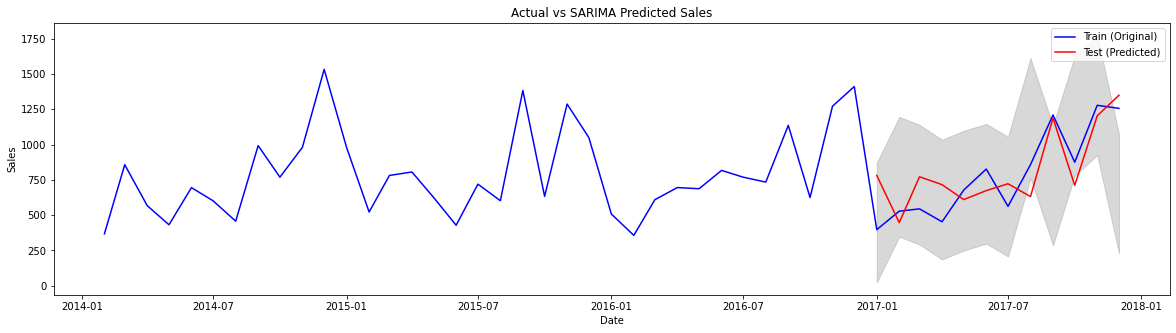

In [67]:
# Plot the actual values and predictions
plt.figure(figsize=(20,5))
plt.plot(furniture_df.index, furniture_df['Sales'], label='Train (Original)', color='blue')
plt.plot(test_df.index, predictions, label='Test (Predicted)', color='red')

# Add confidence intervals
pred_confidence = sarima_model_fit.get_forecast(len(test_df)).conf_int()
plt.fill_between(test_df.index, pred_confidence.iloc[:, 0], pred_confidence.iloc[:, 1], color='gray', alpha=0.3)

plt.title('Actual vs SARIMA Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()


In [68]:
# Evaluate the model
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 35053.864799819
Mean Absolute Error (MAE): 159.56071529252083
Root Mean Squared Error (RMSE): 187.22677372592574


Among all the models tried so far, SARIMA performed the best with the lowest MAE of 139.88. However, let's explore exponential smoothing methods to see if there are any differences in the models' performance.

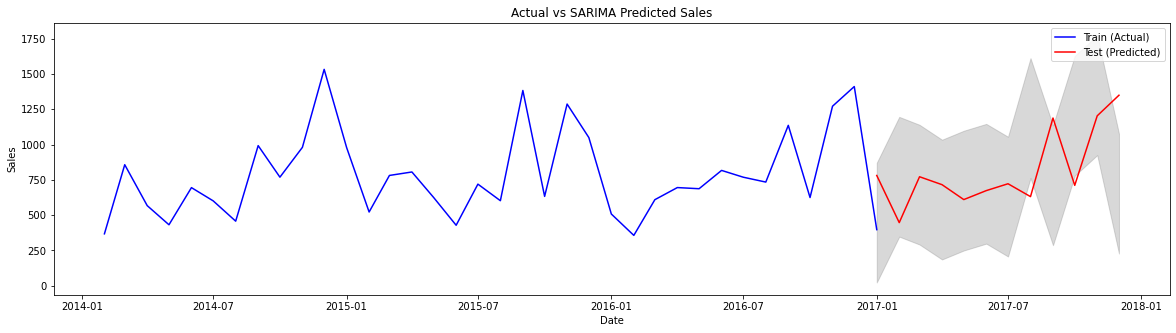

In [69]:
# Plot the actual values and predictions
plt.figure(figsize=(20,5))
plt.plot(train_df.index, train_df['Sales'], label='Train (Actual)', color='blue')
#plt.plot(furniture_df.index, furniture_df['Sales'], label='Train (Original)', color='blue')
plt.plot(test_df.index, predictions, label='Test (Predicted)', color='red')

# Add confidence intervals
pred_confidence = sarima_model_fit.get_forecast(len(test_df)).conf_int()
plt.fill_between(test_df.index, pred_confidence.iloc[:, 0], pred_confidence.iloc[:, 1], color='gray', alpha=0.3)

plt.title('Actual vs SARIMA Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()


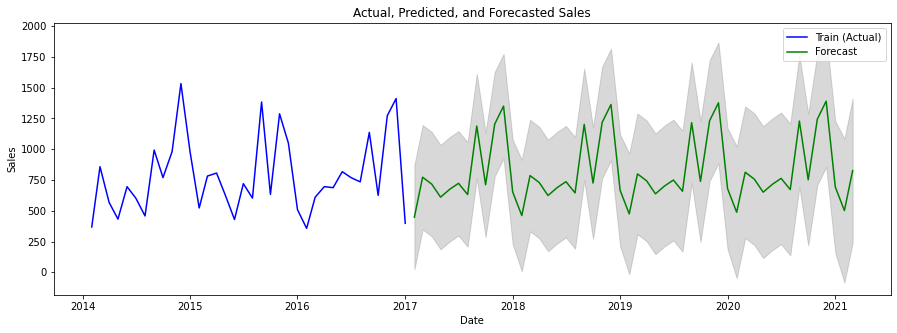

In [70]:
# Forecast for the next 50 steps
forecast = sarima_model_fit.get_forecast(steps=50)

# Get the predicted values
predicted_values = forecast.predicted_mean

# Get the confidence intervals
pred_confidence = forecast.conf_int()

# Plot the actual values, predictions, and forecasted values with confidence intervals
plt.figure(figsize=(15, 5))
plt.plot(train_df.index, train_df['Sales'], label='Train (Actual)', color='blue')
#plt.plot(furniture_df.index, furniture_df['Sales'], label='Train (Original)', color='blue')
#plt.plot(test_df.index, predictions, label='Test (Predicted)', color='red')
plt.plot(predicted_values.index, predicted_values, label='Forecast', color='green')

# Add confidence intervals for the forecasted values
plt.fill_between(pred_confidence.index, pred_confidence.iloc[:, 0], pred_confidence.iloc[:, 1], color='gray', alpha=0.3)

plt.title('Actual, Predicted, and Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


#### SARIMAX

### Exponential smoothing model s 
- **Simple Exponential Smoothing**
- **Holt’s Linear Trend method**
- **Holt-Winters Method**

#### Simple Exponential Smoothing

Definition: Simple exponential smoothing assigns exponentially decreasing weights to past observations to forecast future values.

How it works: The model uses a single smoothing factor (α) to give more weight to recent observations and less weight to older observations.

Example: The forecast at time t (F(t)) is calculated as: F(t) = α*Y(t) + (1-α)*F(t-1), where Y(t) is the current value and F(t-1) is the previous forecast.

In [71]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Train and fit the model
exp_smoothing_model = ExponentialSmoothing(train_df['Sales'])
exp_smoothing_model_fit = exp_smoothing_model.fit()

# Print AIC value
print(f"AIC: {exp_smoothing_model_fit.aic}")

AIC: 420.64549250673997


In [72]:
# Make predictions on the test data
predictions = exp_smoothing_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])

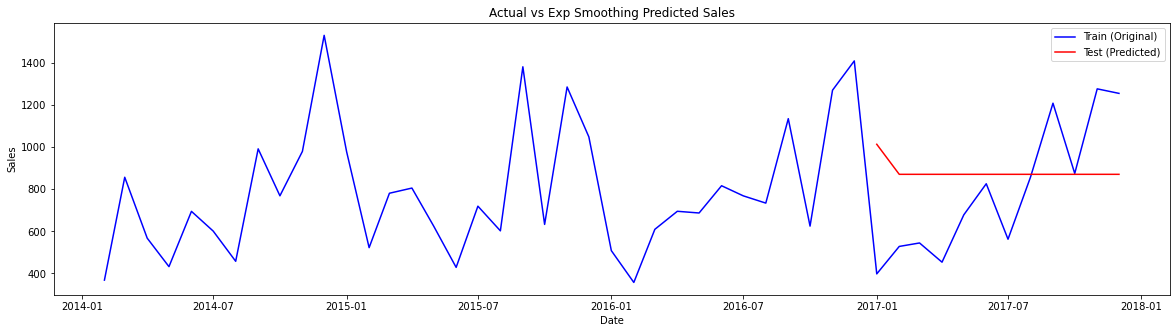

In [73]:
# Plot the actual values and predictions
plt.figure(figsize=(20,5))
plt.plot(furniture_df.index, furniture_df['Sales'], label='Train (Original)', color='blue')
plt.plot(test_df.index, predictions, label='Test (Predicted)', color='red')

plt.title('Actual vs Exp Smoothing Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

Reason for moving to the next model: The Exponential smoothing model is not able to capture  patterns and seasonality in the data.

#### Holt’s Linear Trend method

Definition: Holt's trend model extends simple exponential smoothing to capture both trend and level in the time series.

How it works: The model incorporates smoothing factors for the level (α) and trend (β) components to forecast future values.

Example: The level (L(t)) and trend (B(t)) at time t are updated as: L(t) = αY(t) + (1-α)(L(t-1) + B(t-1)) and B(t) = β*(L(t) - L(t-1)) + (1-β)*B(t-1), where Y(t) is the current value, L(t-1) and B(t-1) are the previous level and trend, and α and β are the smoothing factors.

In [74]:
from statsmodels.tsa.holtwinters import Holt

# Train and fit the model
holt_model = Holt(train_df['Sales'])
holt_model_fit = holt_model.fit()

# Print AIC value
print(f"AIC: {holt_model_fit.aic}")


AIC: 430.9181173450652


In [75]:
# Make predictions on the test data
predictions = holt_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])

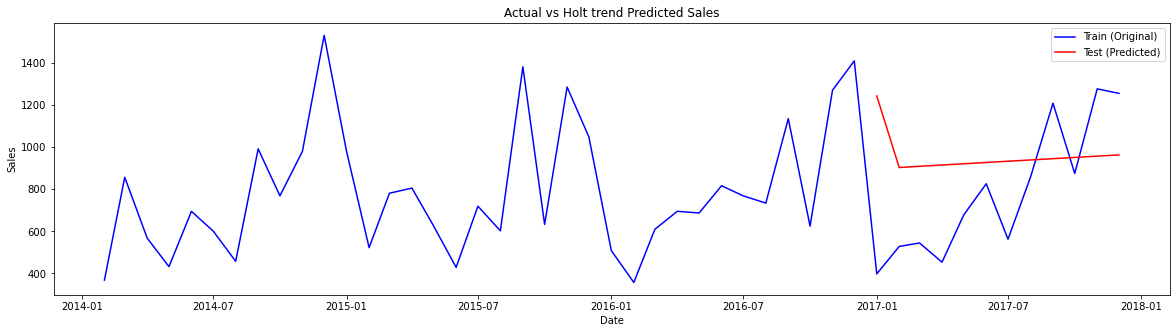

In [76]:
# Plot the actual values and predictions
plt.figure(figsize=(20,5))
plt.plot(furniture_df.index, furniture_df['Sales'], label='Train (Original)', color='blue')
plt.plot(test_df.index, predictions, label='Test (Predicted)', color='red')

plt.title('Actual vs Holt trend Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [77]:
# Evaluate the model
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 140139.26098064872
Mean Absolute Error (MAE): 316.57206492543133
Root Mean Squared Error (RMSE): 374.3517877353449


Reason for moving to the next model: The Holt-trends model is not able to capture  patterns and seasonality in the data.

#### Holt-Winters Method

Definition: Holt-Winters' seasonal model extends Holt's trend model to include seasonality.

How it works: The model incorporates smoothing factors for the level (α), trend (β), and seasonal (γ) components to forecast future values.

Example: The level (L(t)), trend (B(t)), and seasonal (S(t)) at time t are updated as: L(t) = α*(Y(t) - S(t-m)) + (1-α)(L(t-1) + B(t-1)), B(t) = β(L(t) - L(t-1)) + (1-β)B(t-1), and S(t) = γ(Y(t) - L(t)) + (1-γ)*S(t-m), where Y(t) is the current value, L(t-1), B(t-1), and S(t-m) are the previous level, trend, and seasonal values, and α, β, and γ are the smoothing factors.

In [78]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Train and fit the model
holtwinters_model = ExponentialSmoothing(train_df['Sales'], trend='add', seasonal='add', seasonal_periods=12)
holtwinters_model_fit = holtwinters_model.fit()

# Print AIC value
print(f"AIC: {holtwinters_model_fit.aic}")

AIC: 391.65989078964265


In [79]:
# Make predictions on the test data
predictions = holtwinters_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])

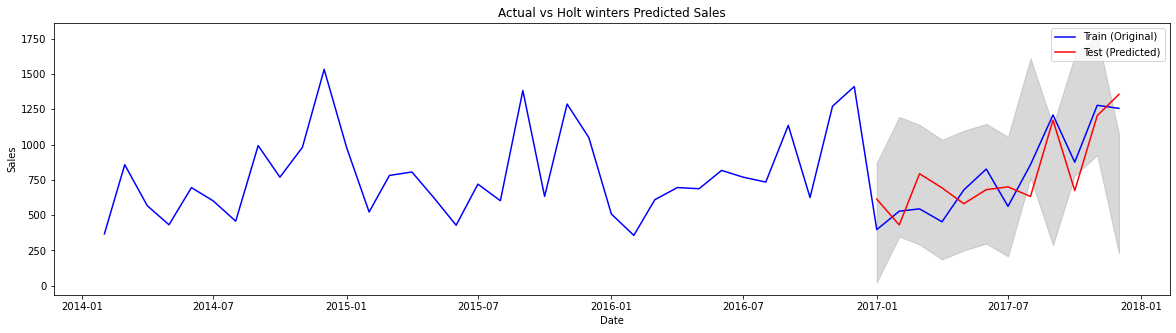

In [80]:
# Plot the actual values and predictions
plt.figure(figsize=(20,5))
plt.plot(furniture_df.index, furniture_df['Sales'], label='Train (Original)', color='blue')
plt.plot(test_df.index, predictions, label='Test (Predicted)', color='red')

# Add confidence intervals
pred_confidence = sarima_model_fit.get_forecast(len(test_df)).conf_int()
plt.fill_between(test_df.index, pred_confidence.iloc[:, 0], pred_confidence.iloc[:, 1], color='gray', alpha=0.3)

plt.title('Actual vs Holt winters Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [81]:
# Evaluate the model
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 27765.548690240452
Mean Absolute Error (MAE): 151.57466271446717
Root Mean Squared Error (RMSE): 166.6299753652999


The Holts-winter method performs and captures the patterns and seasonalities similar to the SARIMA best model fit. Both of the plots look similar .However, when observed SARIMA model has least MAE so we forecasted the future values using SARIMA Model

### Time series regression 

To use regression techniques in time series analysis, you need to include independent variables alongside the dependent variable (time series) in your dataset. Here is an example line that demonstrates including both the independent variables and the dependent variable in the code like linear regression,XG Boost etc

After exploring the above time series models, the next step is to try LSTM (Long Short-Term Memory) and RNN (Recurrent Neural Network) models. These deep learning models are capable of capturing complex temporal dependencies and can handle long-term seasonality and non-linear patterns in the data. They utilize the memory cell and recurrent connections to learn from the sequential nature of time series data.

### Deep Learning and recent models 
- **Neural networks(LSTM,RNN)**
- **Prophet**

Neural networks are growing in popularity. Neural networks aim to solve problems that would be impossible or difficult to solve with statistical or classical methods. Two of the most popular time series forecasting neural networks are artificial neural networks (ANNs) and recurrent neural networks (RNNs). ANNs were inspired by the way the nervous system and brain processes information. RNNs were designed to be able to remember important information about recent inputs, which they can then use to generate accurate forecasts.

A long short term memory network (LSTM) is a type of RNN that is especially popular in the time series space. It has forget gates and feed forward mechanisms that allow the network to retain information, forget extraneous inputs, and update the forecasting procedure to model and forecast complex time series problems.

## Evaluation Metrics

In time series forecasting, metrics such as Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and Mean Squared Error (MSE) are commonly employed for evaluating the accuracy and performance of forecast model

| Model        | MAE Value  | RMSE Value | 
|--------------|------------|------------|
| AR           |  249.12    |  300.26    |
| MA           |  250.61    |  301.39    |
| ARMA         |  254.04    |  303.58    |
| ARIMA        |  253.64    |  303.71    |
| SARIMA       |  139.88    |  165.02    |
| Holt-Trend   |  308.67    |  388.61    |
| Holt-Winters |  144.51    |  167.37    |
| LSTM-RNN     |            |            |


After Observing the above MAE, MSE and RMSE VALUE, We can say that SARIMA Model gives the best fit and the Holt-winters perform better after the SARIMA Model

## Summary

Summary of Time Series Analysis Project:

1. Introduction to Time Series: Gain a conceptual understanding of time series data, which represents observations collected over time.

2. Exploring the 'Superstore Sales' Dataset: Explore the dataset to understand its structure, variables, and patterns.

3. Installing and Importing Required Libraries: Install and import the necessary libraries and packages for data analysis and modeling, such as pandas, NumPy, matplotlib, statsmodels, etc.

4. Downloading the Dataset: Download the 'Superstore Sales' dataset and load it into your programming environment.

5. Understanding the Data: Analyze the dataset to understand the variables, data types, and any missing values or outliers.

6. Hypothesis Generation: Generate hypotheses about the relationships, patterns, and trends present in the data based on your domain knowledge.

7. Visualizing the Time Series: Plot the time series data to visualize trends, patterns, seasonality, and any observations of interest.

8. Set Time Index: Set the time index of the dataset to facilitate time-based analysis and modeling.

10. Time Resampling: Resample the time series data to a different time frequency, such as converting daily data to monthly or annual data, to analyze different time granularities.

11. Visualizing Trend, Pattern, Seasonalities, and Observations: Further analyze and visualize the time series by decomposing it into trend, seasonality, and residual components.

12. Testing for Stationarity: Apply statistical tests like Augmented Dickey-Fuller (ADF) test to check the stationarity of the time series.

13. Differencing and Transformation: Perform differencing and transformations on the time series data to stabilize the mean and variance and make it stationary if required.

14. Autocorrelation and Partial Autocorrelation Analysis: Analyze the autocorrelation and partial autocorrelation functions to determine the order of autoregressive (AR) and moving average (MA) terms in the time series models.

15. Preparing Time Series Dataset before Applying Models: Preprocess the time series dataset by setting the time index, checking for white noise, handling missing values, normalizing or scaling the data, etc.

16. Time Series Forecasting Models: Apply the appropriate time series forecasting models such as AR, MA, ARMA, ARIMA, and SARIMA to forecast future values based on historical patterns and trends.

17. Evaluation Metrics: Use evaluation metrics like Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and Mean Squared Error (MSE) to assess the accuracy and performance of the forecasting models.


## Conclusion